<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/0_colab_intro_yours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I COLAB INTRO

# 0. Connect Database to get the dataset

In [1]:
! pip install pymysql

In [1]:
# import data from mySQL database  using the following info host: database-klee.cbgcswckszgl.us-east-1.rds.amazonaws.com, id erau, password 1212, db='data', port 3306
import pymysql
import pandas as pd

In [2]:
# 1.1 Practice DB connection
connection = pymysql.connect(
    host='database-klee.cbgcswckszgl.us-east-1.rds.amazonaws.com',
    user='erau',
    password='1212',
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
)

cursor = connection.cursor()
print("Connected to database!")

Connected to database!


In [3]:
#1.2 show available databases
cursor.execute("SHOW DATABASES")
print("Available databases:")
for db in cursor.fetchall():
    print(f"- {db['Database']}")

Available databases:
- airline_db
- condo
- hr
- information_schema
- performance_schema
- toy


In [4]:
#1.3 airline_db select airline_db by USE commend
cursor.execute("USE airline_db")
print('connected to airline_db')

connected to airline_db


In [5]:
#1.3 airline_db 
cursor.execute("SHOW TABLES")
print("\nAvailable tables in airline_db:")
tables = cursor.fetchall()
for table in tables:
    table_name = list(table.values())[0]
    print(f"- {table_name}")


Available tables in airline_db:
- aircraft
- airlines
- airports
- bookings
- flights
- flights_delay
- passengers
- seat_map
- tickets


In [6]:
#1.4 select * from airports table.
cursor.execute("SELECT * FROM airports  WHERE city in ('Paris', 'Tokyo') ")
results =pd.DataFrame(cursor.fetchall())
results

,airport_code,airport_name,city,country,timezone,latitude,longitude
0,CDG,Charles de Gaulle Airport,Paris,France,Europe/Paris,49.00970000,2.54790000
1,HND,Haneda Airport,Tokyo,Japan,Asia/Tokyo,35.54940000,139.77980000
2,NRT,Narita International Airport,Tokyo,Japan,Asia/Tokyo,35.76530000,140.38560000


In [7]:
#1.4 select * from airports table.
cursor.execute("""
SELECT f.flight_number,  a.airline_name
FROM flights f
JOIN airlines a ON f.airline_code = a.airline_code 
""")
results =pd.DataFrame(cursor.fetchall())
results

,flight_number,airline_name
0,AA649,American Airlines
1,AA182,American Airlines
2,AA742,American Airlines
3,AA802,American Airlines
4,AA607,American Airlines
...,...,...
210,UA563,United Airlines
211,UA835,United Airlines
212,UA320,United Airlines
213,UA480,United Airlines


In [8]:
cursor.execute('''
SELECT * FROM bookings ORDER BY total_price LIMIT 1
''')
results=pd.DataFrame(cursor.fetchall())
results


,booking_id,passenger_id,booking_date,total_price,currency,payment_status,booking_status
0,BXQTYA,561,2025-07-23 14:52:04,544.81,USD,PAID,CONFIRMED


In [9]:
#1.5 database connection close and cursor close
cursor.close()
connection.close()

---

In [10]:
# 2 Perform compensation database with a single connection
with pymysql.connect(host='database-klee.cbgcswckszgl.us-east-1.rds.amazonaws.com',
                    user='erau',
                    password='1212',
                    db='hr',
                    charset='utf8mb4',
                    cursorclass=pymysql.cursors.DictCursor) as connection:

    with connection.cursor() as cursor:
        # 1. Show available databases
        cursor.execute("SHOW DATABASES")
        print("Available databases:")
        for db in cursor.fetchall():
            print(db['Database'])

        print("\nAvailable tables in selected database:")
        
        # 2. Show tables in current database
        cursor.execute("SHOW TABLES")
        for table in cursor.fetchall():
            print(list(table.values())[0])  

        print("\nFetching compensation:")
        # 3. Fetch Salary_Data and create DataFrame
        cursor.execute("SELECT * FROM compensation")
        df = pd.DataFrame(cursor.fetchall())

# Display the DataFrame
df

Available databases:
airline_db
condo
hr
information_schema
performance_schema
toy

Available tables in selected database:
compensation

Fetching compensation:


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# 1. Conventional Approach of Reression

## 1.1 Check the Dataset

In [11]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

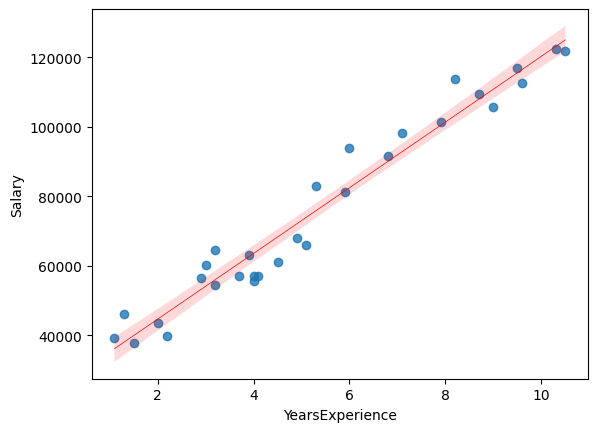

In [12]:
import seaborn as sns
sns.regplot(data=df, x='YearsExperience', y='Salary', line_kws={'color': 'red', 'lw':.5})

## 1.2 Fitting the Model

In [15]:
# dataframe df: run linear regression using statmodels

import statsmodels.formula.api as smf
# Fit the linear regression model
model = smf.ols(formula="Salary ~ YearsExperience", data=df)
results=model.fit()

# Print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           1.14e-20
Time:                        13:29:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

'''
APA report example:
'''
    A linear regression analysis was conducted to examine the relationship between years of experience and salary.
    The model explained a significant proportion of variance in salary, R² = .957, F(1, 28) = 622.5, p < .001.

    Years of experience significantly predicted salary (β = 9449.96, SE = 378.76, p < .001), with each additional
    year of experience associated with an increase of $9,449.96 in salary. The model's intercept was $25,790
    (SE = 2273.05, p < .001), representing the predicted salary for someone with no experience.

    

    The regression equation can be expressed as:
    Salary = 25,790 + 9449.96 × YearsExperience
'''

# 2. Machine Learning Approach

## 2.1 Check Dataset

In [15]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## 2.2 Preprocessing : Train-Test Split

In [16]:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['YearsExperience']], df['Salary'], test_size=0.25, random_state=0)


## 2.3 Model Fitting: Using Train Set

In [17]:

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# check model coeffs

print(model.coef_[0].round(2))
print(model.intercept_.round(2))

9379.71
26986.69


In [19]:
sl=model.coef_[0].round(2)

In [20]:
inter=model.intercept_.round(2)

In [21]:
# specify model equation

print(f"Salary = {sl} * YearsExperience + {inter}")

Salary = 9379.71 * YearsExperience + 26986.69


## 2.4 Make prediction : using Test set

In [22]:
# Make predictions using the model
y_pred = model.predict(X_test)


In [23]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

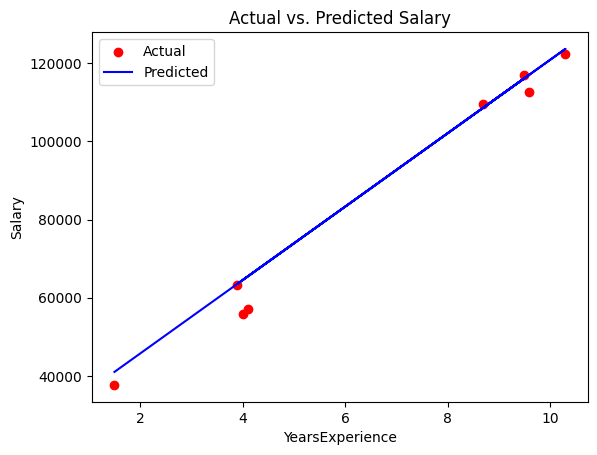

In [24]:
# Plot the actual and predicted values
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred, color='blue', label='Predicted')
plt.title('Actual vs. Predicted Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()



## 2.5 Evaluate the Model : $R^2$ and $MSE$ mean squared error
- MSE(or RMSE) is a 'relative metric' : used to compare with other models

In [25]:
model.score(X_test, y_test)

0.9779208335417602

In [26]:
# evaluate the model

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = round(mean_squared_error(y_test, y_pred), 2)

# Print the mean squared error
print("Mean squared error:", mse)


Mean squared error: 22407940.14


---
---

## 2.5 Some Equations

### 2.5.1 **Coe-efficient of Determination**

$$ R^2 = 1−\frac{\text{Residual Sum of Squares (RSS)}}{\text{Total Sum of Square (TSS)}​} $$  


$$ \text{R}^2 =1-\frac{\sum\limits_{i=1}^{N}(y_i - \hat{y}_i)^2}{\sum\limits_{i=1}^{N} (y_i - \bar{y})^2}\ $$  


<img src="https://github.com/kjmobile/data/blob/main/img/R2_2.png?raw=true" width=700 />

### 2.5.2 **Mean Squared Error (MSE)** :



$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$



**note:**

* $\frac{1}{n}$: This is the normalization factor dividing by the number of observations.
* $\sum_{i=1}^{n}$: This is the summation symbol, indicating we sum over all observations from 1 to n.
* $y_i$: This represents the actual value of the i-th observation.
* $\hat{y}_i$: This represents the predicted value of the i-th observation.
* $^2$: This squares the difference between the actual and predicted values.

